In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
data_train = digits["data"]
labels_train = digits["target"]

In [5]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

C = [0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.1, 0.01, 0.001, 0.0001, 0.00001]

param_grid = [{'C': C, 'gamma': gamma, 'kernel': ['rbf']}]
gridsearch = GridSearchCV(cv = 5, estimator = SVC(), param_grid=param_grid)
gridsearch.fit (data_train, labels_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [6]:
gridsearch.cv_results_

{'mean_fit_time': array([0.24010954, 0.24139771, 0.23325124, 0.23391199, 0.23206735,
        0.24914527, 0.23888378, 0.12364392, 0.17500052, 0.23130822,
        0.26448355, 0.26897883, 0.06922426, 0.05892339, 0.16071444,
        0.27872815, 0.26970363, 0.07012248, 0.03645129, 0.05598102,
        0.27939105, 0.26867504, 0.0688602 , 0.03393397, 0.03331599,
        0.27853379, 0.26824937, 0.06868491, 0.03352718, 0.03296199]),
 'std_fit_time': array([0.00546976, 0.0055099 , 0.00257784, 0.00399317, 0.00121279,
        0.00079464, 0.00774919, 0.00180697, 0.00177555, 0.00036296,
        0.00057968, 0.00086301, 0.00092156, 0.00116188, 0.00171726,
        0.00134573, 0.00124913, 0.00168996, 0.00261485, 0.00137123,
        0.00260909, 0.00046639, 0.00110023, 0.00100018, 0.00079981,
        0.00236847, 0.00079565, 0.00114428, 0.00080802, 0.00106758]),
 'mean_score_time': array([0.1172183 , 0.11807947, 0.11772289, 0.11892953, 0.11581697,
        0.11656322, 0.11914587, 0.08874288, 0.11809545, 0.12

In [7]:
mean_score = gridsearch.cv_results_ ["mean_test_score"].reshape(len(C), len(gamma))
print(mean_score)
std_score = gridsearch.cv_results_ ["std_test_score"].reshape(len(C), len(gamma))
print(std_score)

[[0.10183844 0.11799443 0.17312597 0.15810585 0.15810585]
 [0.10183844 0.11799443 0.94325132 0.88037295 0.15810585]
 [0.10295265 0.69566543 0.97218663 0.94714794 0.88538069]
 [0.10239554 0.70678737 0.97218508 0.95994274 0.94547818]
 [0.10239554 0.70678737 0.97218508 0.96216496 0.95605076]
 [0.10239554 0.70678737 0.97218508 0.96216496 0.94881151]]
[[0.00150108 0.01812821 0.04446176 0.04764993 0.04764993]
 [0.00150108 0.01812821 0.0222825  0.0294484  0.04764993]
 [0.00261661 0.05200341 0.01501349 0.02392391 0.03120804]
 [0.00220461 0.04820007 0.01349126 0.02337099 0.02441205]
 [0.00220461 0.04820007 0.01349126 0.01673194 0.01975443]
 [0.00220461 0.04820007 0.01349126 0.01673194 0.01984911]]


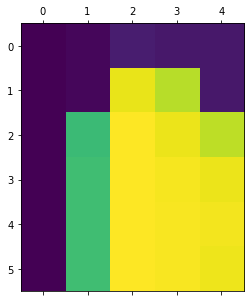

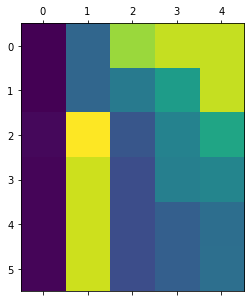

In [8]:
import matplotlib.pyplot as plt

mean_plot = plt.matshow (mean_score)
plt.matshow (std_score)

In [9]:
import numpy as np
def true_fun(X):
    return np.cos (1.5*np.pi*X)

X_finegrid = np.linspace(0,1,100)

In [10]:
np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_test = np.sort(np.random.rand(n_samples))
y_test = true_fun(X_test) + np.random.randn(n_samples) * 0.1

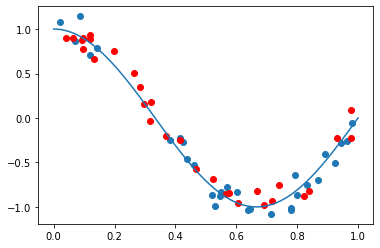

In [11]:
plt.scatter(X, y)
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_finegrid, true_fun(X_finegrid))

(-1.5, 2.0)

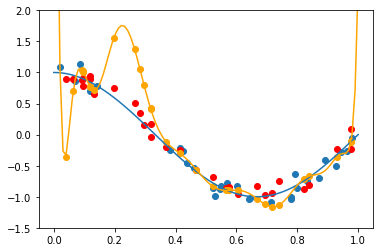

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


polynomial_features = PolynomialFeatures(degree = 14, include_bias = False) 

pipeline = Pipeline ([("polynomial features", polynomial_features),
                      ("linear regression", LinearRegression())])

pipeline.fit (X [:, np.newaxis], y)

y_pred = pipeline.predict(X_test[:, np.newaxis])

plt.scatter(X, y)
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_finegrid, true_fun(X_finegrid))
plt.scatter(X_test, y_pred, color = "orange")
plt.plot(X_finegrid, pipeline.predict(X_finegrid[:, np.newaxis]), color = "orange")

sqrt(mean_squared_error(y_test, y_pred))
plt.ylim(-1.5,2)